# Task-3
**Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.**

Sample Dateset :- https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
banking=pd.read_csv("Data/bank.csv")
banking

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [4]:
banking.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
banking.tail()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no
11161,34,technician,married,secondary,no,0,no,no,cellular,9,jul,628,1,-1,0,unknown,no


In [6]:
banking.shape

(11162, 17)

In [7]:
banking.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [8]:
banking.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [11]:
banking["job"].value_counts()

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: count, dtype: int64

In [12]:
marital_stat = banking["marital"].value_counts()
print("Total number of customers by marital status:\n",marital_stat)

Total number of customers by marital status:
 marital
married     6351
single      3518
divorced    1293
Name: count, dtype: int64


In [14]:
pret_housing = round(len(banking[banking['housing'] == 'yes'])/len(banking)*100,2)
print("The proportion of customers with a housing loan is :",pret_housing,'%')

The proportion of customers with a housing loan is : 47.31 %


In [15]:
avg = round(banking[banking["housing"] == "yes"]["balance"].mean(),2)
print("The average account balance of customers with a housing loan",avg)

The average account balance of customers with a housing loan 1266.15


In [17]:
solde = round(banking.groupby('job')['balance'].mean().reset_index(name='average_balance'),2)
print(solde)

              job  average_balance
0          admin.          1195.87
1     blue-collar          1203.93
2    entrepreneur          1621.94
3       housemaid          1366.16
4      management          1793.66
5         retired          2417.25
6   self-employed          1865.37
7        services          1081.17
8         student          1500.78
9      technician          1556.29
10     unemployed          1314.72
11        unknown          1945.46


In [19]:
deposit=banking[banking['deposit']=='yes']['marital'].value_counts()
print("The breakdown of term deposit customers by marital status\n")
deposit

The breakdown of term deposit customers by marital status



marital
married     2755
single      1912
divorced     622
Name: count, dtype: int64

In [21]:
avg=round(banking[banking['deposit']=='yes']['age'].mean(),2)
print("The average age of term deposit customers:",avg)

The average age of term deposit customers: 41.67


In [22]:
banking.groupby(['job','marital']).size().reset_index(name='total number')

,job,marital,total number
0,admin.,divorced,182
1,admin.,married,677
2,admin.,single,475
3,blue-collar,divorced,149
4,blue-collar,married,1335
5,blue-collar,single,460
6,entrepreneur,divorced,42
7,entrepreneur,married,234
8,entrepreneur,single,52
9,housemaid,divorced,46


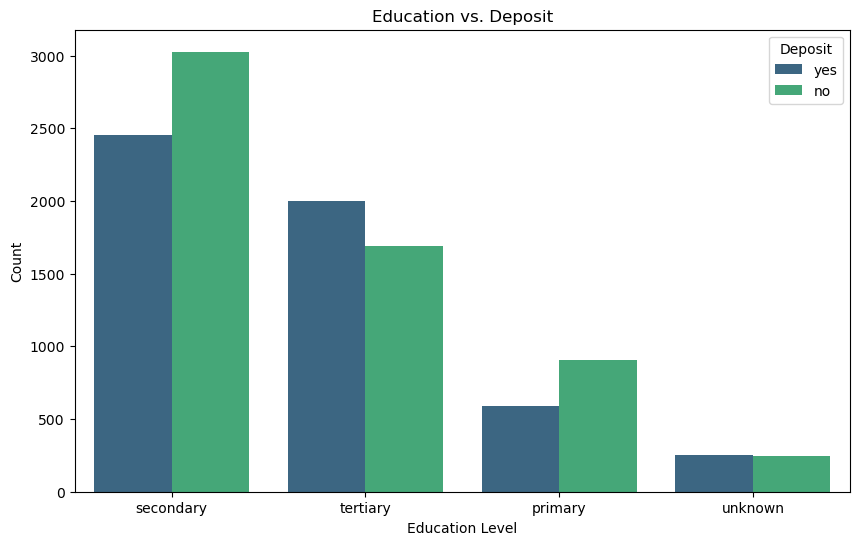

In [24]:
plt.figure(figsize=(10, 6))
sns.countplot(x="education", data=banking, hue="deposit", palette="viridis")
plt.title("Education vs. Deposit")
plt.xlabel("Education Level")
plt.ylabel("Count")
plt.legend(title="Deposit", loc="upper right")
plt.show()

C:\Users\KIIT\Desktop\datascience_project\env\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


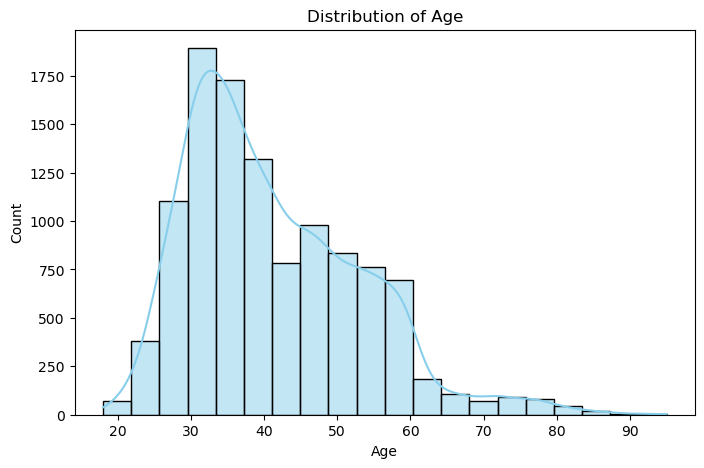

In [25]:
plt.figure(figsize=(8, 5))
sns.histplot(banking["age"], bins=20, kde=True, color="skyblue")
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

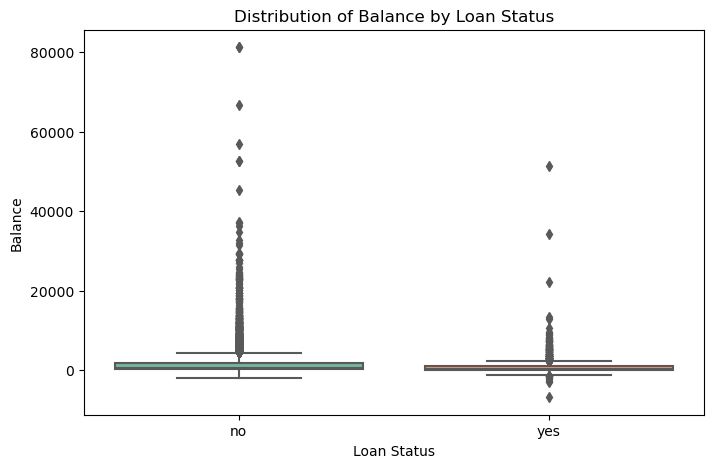

In [26]:
plt.figure(figsize=(8, 5))
sns.boxplot(x="loan", y="balance", data=banking, palette="Set2")
plt.title("Distribution of Balance by Loan Status")
plt.xlabel("Loan Status")
plt.ylabel("Balance")
plt.show()

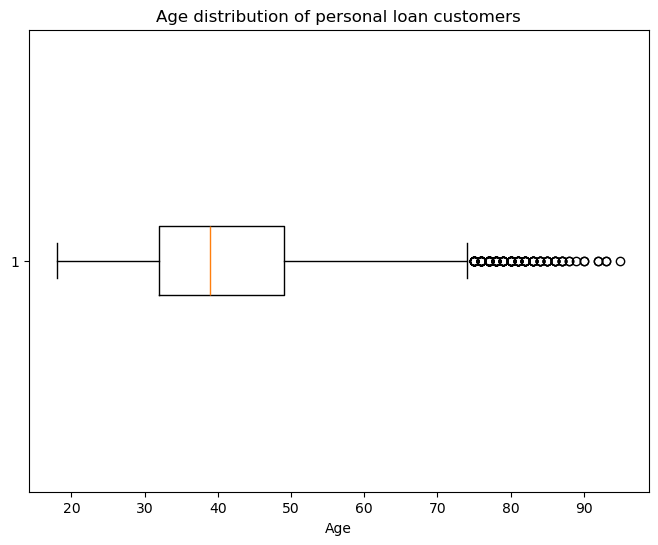

In [28]:
plt.figure(figsize=(8, 6))
plt.boxplot(banking['age'], vert=False)
plt.title('Age distribution of personal loan customers')
plt.xlabel('Age')
plt.show()

In [29]:
# Convert categorical columns to category dtype
categorical_cols = ["job", "marital", "education", "default", "housing", "loan", "contact", "month", "poutcome", "deposit"]
for col in categorical_cols:
    banking[col] = banking[col].astype("category")

# Encode categorical variables
banking = pd.get_dummies(banking, drop_first=True)

# Display the cleaned dataset
print(banking.head())

   age  balance  day  duration  campaign  pdays  previous  job_blue-collar  \
0   59     2343    5      1042         1     -1         0            False   
1   56       45    5      1467         1     -1         0            False   
2   41     1270    5      1389         1     -1         0            False   
3   55     2476    5       579         1     -1         0            False   
4   54      184    5       673         2     -1         0            False   

   job_entrepreneur  job_housemaid  ...  month_jun  month_mar  month_may  \
0             False          False  ...      False      False       True   
1             False          False  ...      False      False       True   
2             False          False  ...      False      False       True   
3             False          False  ...      False      False       True   
4             False          False  ...      False      False       True   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0 

In [33]:
from sklearn.model_selection import train_test_split

# Defining features (X) and target (y)
X = banking.drop("deposit_yes", axis=1)
y = banking["deposit_yes"]

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.tree import DecisionTreeClassifier

# Creating a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)

# Training the classifier
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [35]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predicting on the test set
y_pred = dt_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Classifier Accuracy: {accuracy:.2f}")

# Displaying classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Displaying confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Decision Tree Classifier Accuracy: 0.79
Classification Report:
              precision    recall  f1-score   support

       False       0.79      0.80      0.80      1166
        True       0.78      0.77      0.78      1067

    accuracy                           0.79      2233
   macro avg       0.79      0.79      0.79      2233
weighted avg       0.79      0.79      0.79      2233

Confusion Matrix:
[[938 228]
 [242 825]]


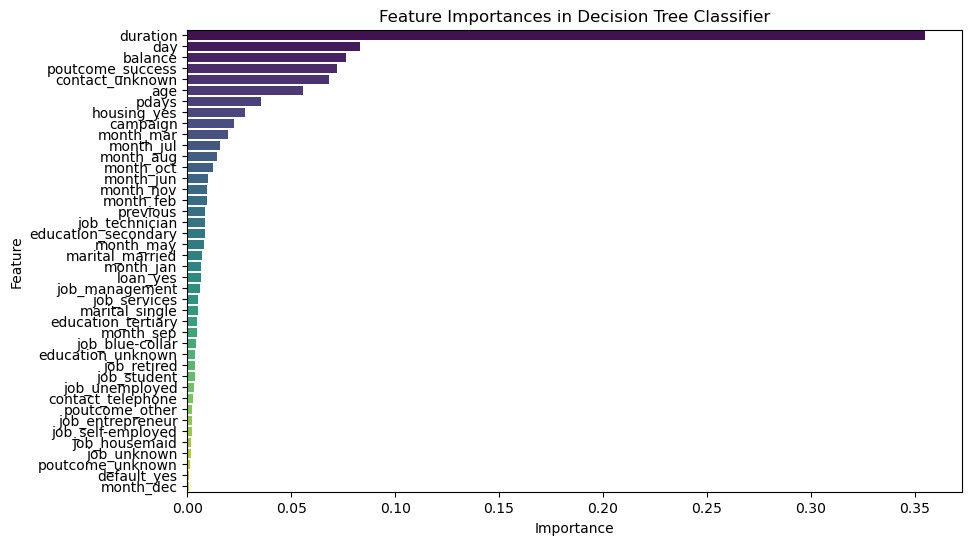

In [36]:
# Getting feature importances
feature_importances = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt_classifier.feature_importances_
})

# Sorting feature importances
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importances, palette="viridis")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importances in Decision Tree Classifier")
plt.show()